# Ejercicio de análisis exploratorio de datos

Importamos las librerias con las que vamos a trabajar

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 

Cargamos el dataset con el que vamos a trabajar, en este caso lo haremos con uno del Titanic, en el que el que la pregunta principal es ¿Que factores estan relacionados con que los pasajeros tengan mayor o menos probabilidad de sobrevivir?

 **Cargamos el dataset**

In [2]:

datos = pd.read_csv('titanic.csv')
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Analisis de datos

1. **Mosrtramos cuantas filas y columnas tiene nuestro dataset**

In [3]:

datos.shape  

(891, 12)

2. **Mostramos el  tipo de columnas y los valores nulos**

In [4]:

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3. **Mostramos el nombre de las columnas**

In [5]:

datos.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Preparamos los datos para trabajar

1. **Creamos un indice con la columna PassengerId**

In [6]:

datos.set_index('PassengerId',inplace=True)
datos.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. **Manejo de valores nulos**

In [7]:
# Sacamos que columnas tienen valores nulos
datos.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Como observamos arriba, hay tres columnas con valores nulos, una es Age, otra Cabin y por ultimo Embarked. Las columnas de Age y Cabin si las voy a modificar para quitar los nulos ya que contienen muchas filas de datos. Las de embarcación al ser solo dos, eliminare esas filas.


In [8]:
# Modificamos la columna Age para quitarle los nulos
new_age = datos.Age.mean()
datos['Age'] = datos['Age'].fillna(new_age)
datos['Age'] = datos['Age'].astype(int)
datos['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    29
890    26
891    32
Name: Age, Length: 891, dtype: int32

In [9]:
# Ahora modicicamos Cabin
datos['Cabin'] = pd.to_numeric(datos['Cabin'].str.extract('(\d+)')[0], errors='coerce')
new_cabin = datos.Cabin.mean()
datos['Cabin'] = datos['Cabin'].fillna(new_cabin)
datos

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,50.49,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,85.00,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7925.0000,50.49,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,123.00,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,50.49,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,50.49,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,42.00,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,50.49,S


In [10]:
# Ahora elimino las filas que tienen valores nulos
datos = datos.dropna()


Comprobamos que ya no tenemos ningún dato nulo en nuestro dataset

In [11]:
datos.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Ahora que ya tenemos los datos preparados, empezamos a sacar estadisticas y graficar

### 1. Sacamos porcentajes de hombres y mujeres que sobrevivieron

In [12]:
men = datos.loc[datos.Sex=='male']['Survived']
percentil_men = sum(men) / len(men)
print(f'% de hombres que sobrevivieron: {round(percentil_men,2)*100}%')

% de hombres que sobrevivieron: 19.0%


In [13]:
women = datos.loc[datos.Sex=='female']['Survived']
percentil_women = sum(women) / len(women)
print(f'% de mujeres que sobrevivieron: {round(percentil_men,2)*100}%')

% de mujeres que sobrevivieron: 19.0%


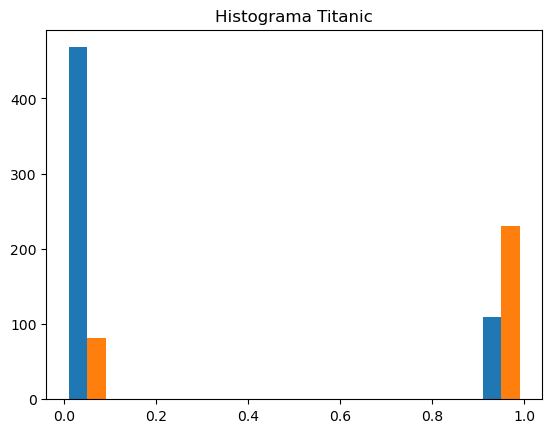

In [14]:
# Lo graficamos 
plt.hist(x=[men,women])
plt.title('Histograma Titanic')
plt.show()

### 2. Verificamos la relacion entre supervivientes y clase

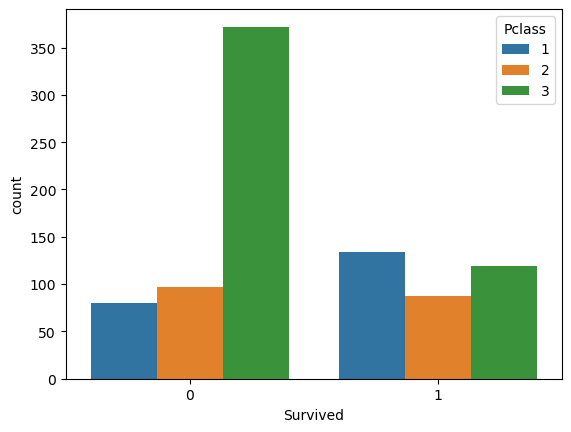

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=datos)
plt.show()

### 3. Verificamos al distribución por edades

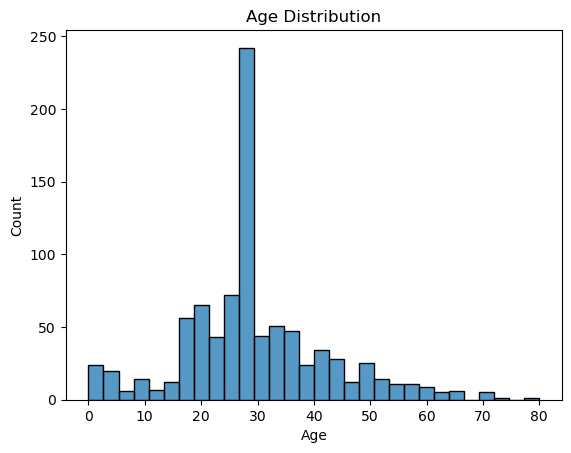

In [33]:
sns.histplot(data=datos, x='Age', bins=30)
plt.title('Age Distribution')
plt.show()


### 4. Verificamos la relacion entre supervivientes y la edad

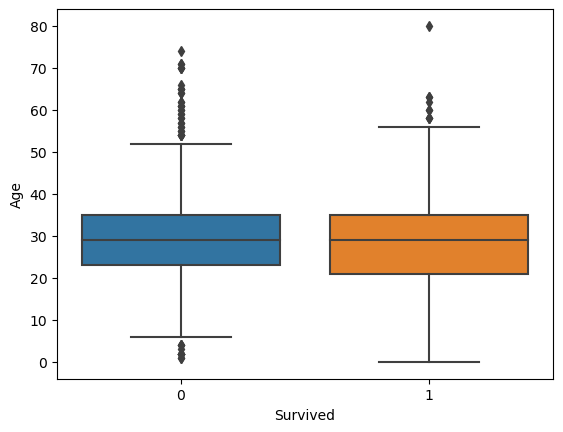

In [16]:
sns.boxplot(x='Survived', y='Age', data=datos)
plt.show()

### 5. Verificamos la relación entre supervivientes y el precio de embarque

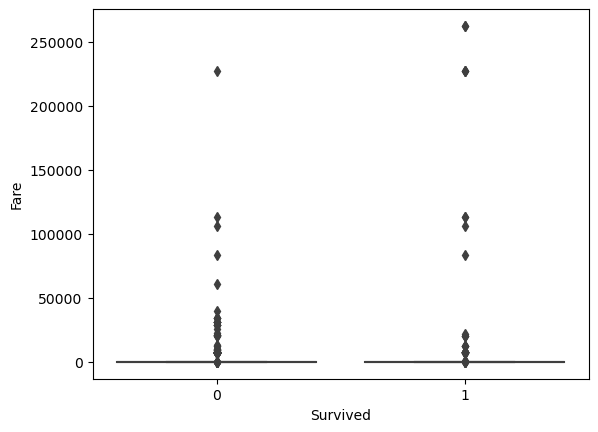

In [17]:
sns.boxplot(x='Survived', y='Fare', data=datos)
plt.show()

### 6. Verificamos la distribución de tarifas

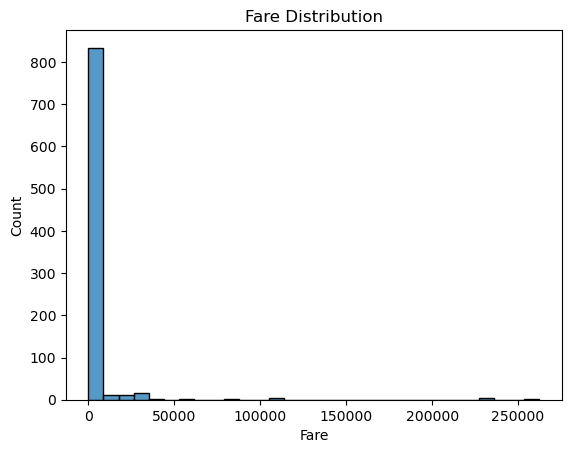

In [20]:
sns.histplot(data=datos, x='Fare', bins=30)
plt.title('Fare Distribution')
plt.show()

### 7. Verificamos la correlacion entre variables numericas

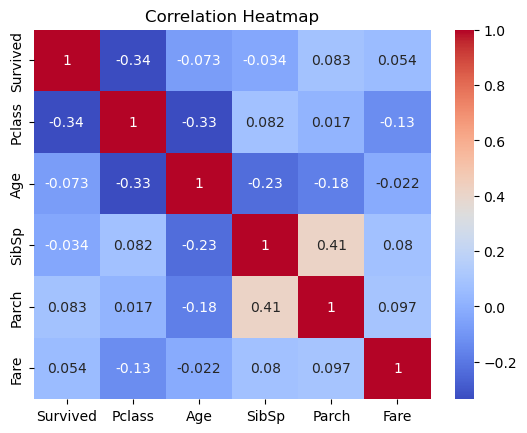

In [31]:
corr = datos[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Arbol de decisión y entrenamiento del modelo

In [21]:
 y = datos['Survived']

1. **Mostramos las columnas para decidir con las que vamos a trabajar**

In [22]:
datos.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

2. **Creamos una variable y le añadimos las columnas elegidas**

In [23]:
variables = ['Pclass','Sex','SibSp','Parch','Fare']

3. **Vamos a eliminar los valores nulos en la tarifa y lo cambiamos por la media**


In [24]:
media = datos['Fare'].mean()
media

4035.148115073114

In [ ]:
datos['Fare'].replace(np.nan,media,inplace=True)
datos

4. **Vamos a cambiar los valores de la columna sexo por numeros para poder trabajar con ellos**


In [25]:
X = pd.get_dummies(datos[variables])
X.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,
1,3,1,0,7.2500,0,1
2,1,1,0,71.2833,1,0
3,3,0,0,7925.0000,1,0
4,1,1,0,53.1000,1,0
5,3,0,0,8.0500,0,1


5. **Preparamos el modelo de clasificación**

In [26]:
modelo = RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0)
modelo.fit(X,y)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

6. **Obtenemos las predicciones**

In [27]:
# En la predicción, el numero cero fallece y el uno sobrevive
predicciones = modelo.predict(X)
predicciones

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

7. **Creamos un dataset con los resultados**

In [28]:
salida = pd.DataFrame({'Identificador':X.index,
                      'Superviviente':predicciones})
salida

,Identificador,Superviviente
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
884,887,0
885,888,1
886,889,0
887,890,1


In [29]:
X.head()


,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,
1,3,1,0,7.2500,0,1
2,1,1,0,71.2833,1,0
3,3,0,0,7925.0000,1,0
4,1,1,0,53.1000,1,0
5,3,0,0,8.0500,0,1


8. **Lo guradamos en un archivo csv**

In [30]:

salida.to_csv('resultadoTitanic.csv',index=False)